# Importing Dependencies

In [170]:
import pandas as pd
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Data Collection and Processing

In [171]:
# loading the dataset
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()


In [172]:
# loading the dataframe
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)


In [173]:
# Adding the target column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [174]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [175]:
# getting some information about the data
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [176]:
# check for the number of missing values
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [177]:
# Statistical Measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [178]:
# checking the distribution of the target variable
data_frame['label'].value_counts()

,count
label,
1,357
0,212


where 0 is cancerous and 1 is Benign

In [179]:
# grouping the dataset by the mean
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Separating the features and the target

In [180]:
X = data_frame.drop(columns = 'label', axis = 1)
Y = data_frame['label']

# Training the Model

In [181]:
# training the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

# Checking how many datapoints we have
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Standardize the data

In [182]:
from sklearn.preprocessing  import StandardScaler


In [183]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X_test_std

array([[-0.04462793, -1.41612656, -0.05903514, ..., -0.18278004,
        -1.23064515, -0.6268286 ],
       [ 0.24583601, -0.06219797,  0.21802678, ...,  0.54129749,
         0.11047691,  0.0483572 ],
       [-1.26115925, -0.29051645, -1.26499659, ..., -1.35138617,
         0.269338  , -0.28231213],
       ...,
       [ 0.72709489,  0.45836817,  0.75277276, ...,  1.46701686,
         1.19909344,  0.65319961],
       [ 0.25437907,  1.33054477,  0.15659489, ..., -1.29043534,
        -2.22561725, -1.59557344],
       [ 0.84100232, -0.06676434,  0.8929529 , ...,  2.15137705,
         0.35629355,  0.37459546]])

Building the Neural  Network

In [184]:
# Importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3) #this fixes the randomness of the result
from tensorflow import keras

In [185]:
# Setting up the layers of my neural network
# the block of code below is responsible for setting up 3 layers of neural network
# 1 layer input, 1 layer hiddden, 1 layer output
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(30,)), #convert the data into single dimensional array
    keras.layers.Dense(20, activation="relu"), #rectified linear unit
    keras.layers.Dense(2, activation="sigmoid")
    ]) #we have two classes we expect to output, that is why there are 2 neuron here





/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [186]:
# We have to compile the neural network, if the dataset is complex, we have to add more layers of neural nrtworks wioth factors like optimizers, loss and etc
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy", #know how to use the different types of loss function
    metrics=["accuracy"]
)

In [187]:
# Training the neural network
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6542 - loss: 0.7558 - val_accuracy: 0.7391 - val_loss: 0.4449
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7461 - loss: 0.4482 - val_accuracy: 0.8913 - val_loss: 0.2912
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8820 - loss: 0.3148 - val_accuracy: 0.9130 - val_loss: 0.2292
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9123 - loss: 0.2539 - val_accuracy: 0.9130 - val_loss: 0.1966
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9262 - loss: 0.2172 - val_accuracy: 0.9348 - val_loss: 0.1753
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9326 - loss: 0.1919 - val_accuracy: 0.9348 - val_loss: 0.1600
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9462 - loss: 0.1734 - val_accuracy: 0.9348 - val_loss: 0.1481
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9523 - loss: 0.1591 - val_accuracy: 0.9565 - val_loss

Visualising the accuracy and the loss

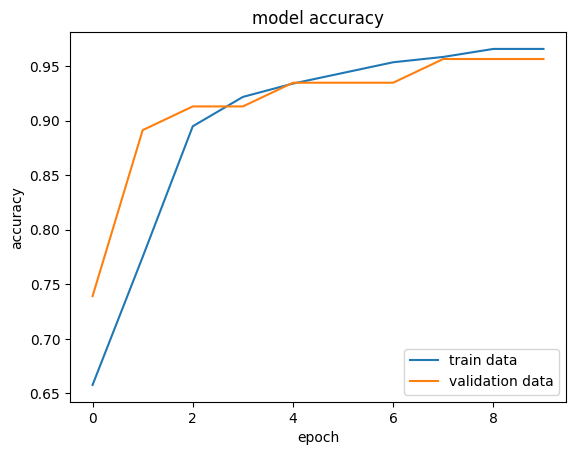

In [188]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train data", "validation data"], loc="lower right")

Accuracy Value of theModel on Testing data

In [189]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print("Test Accuracy:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9641 - loss: 0.1263
Test Accuracy: 0.9649122953414917


Building a Predictive System for unseen data

In [190]:
print(X_test_std[0])

[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [191]:
# making a prediction
Y_pred = model.predict(X_test_std)
print(Y_pred[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[0.39943823 0.97441965]


In [192]:
print(Y_pred) #this is gonna give probabilities

[[0.39943823 0.97441965]
 [0.3936443  0.539586  ]
 [0.03698772 0.97061527]
 [0.9976231  0.00288447]
 [0.46455505 0.5553342 ]
 [0.9059271  0.07841044]
 [0.5251146  0.75499064]
 [0.07117653 0.91636306]
 [0.18752658 0.8198232 ]
 [0.1401643  0.900863  ]
 [0.41189384 0.5167383 ]
 [0.12328821 0.743474  ]
 [0.22565356 0.9620496 ]
 [0.26088834 0.6961152 ]
 [0.08854414 0.90830374]
 [0.8603274  0.30698448]
 [0.10337008 0.92652655]
 [0.1416011  0.9828521 ]
 [0.1302564  0.9726517 ]
 [0.8587905  0.05052695]
 [0.9849584  0.999603  ]
 [0.10229812 0.9500486 ]
 [0.19090004 0.88364244]
 [0.04846371 0.9609061 ]
 [0.17627315 0.86052316]
 [0.7080027  0.2126903 ]
 [0.23329711 0.77344924]
 [0.38005444 0.76368785]
 [0.67402756 0.29567462]
 [0.6721344  0.32796386]
 [0.20202881 0.8208324 ]
 [0.14632408 0.8381793 ]
 [0.11946157 0.95048803]
 [0.86668414 0.02906466]
 [0.8156871  0.09691732]
 [0.36328408 0.9317231 ]
 [0.11376855 0.9167871 ]
 [0.28776556 0.62953943]
 [0.04910298 0.97399795]
 [0.15331864 0.8638556 ]


model.predict() gives the predioction probability of each class for that datapoint.

In [193]:
# converting the prediction probability to class labels
Y_pred_classes = np.argmax(Y_pred, axis=1)
print(Y_pred_classes)

[1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0
 0 1 0]


In [199]:
# building the predictive system
input_data = (19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758)

# change the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

prediction_label = np.argmax(prediction, axis=1)
print(prediction_label)

if(prediction_label[0] == 0):
    print("The Breast Cancer is Malignant")
else:
    print("The Breast Cancer is Benign")


[[ 1.59279133  0.42868677  1.57736179  1.56112512  0.95281644  1.08281996
   1.43216652  2.07230373  0.98193763 -0.40292536  1.24636273 -0.7871939
   0.8650773   1.17187657 -0.27586078  0.84279082  0.28223293  1.53098204
   0.25082742  0.34443745  1.55804995 -0.04170149  1.39131854  1.51651425
   0.54182204  1.09916268  0.87427538  1.97875941  1.19909344  0.20676831]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
[[0.9003616  0.08344778]]
[0]
The Breast Cancer is Malignant
